## Sentiment Analysis!

Sentiment analysis aims to determine a writer’s attitude towards a topic or the overall contextual polarity of a document. The attitude can be his judgment or assessment, his emotional state or the intended emotional communication.

In sentiment analysis, the main task is to identify opinion words, which is very important. Opinion words are dominant indicators of feelings, especially adjectives, adverbs, and verbs, for example: “I love this camera. It’s amazing!”

Opinion words are also known as polarity words, sentiment words, opinion lexicon, or opinion words, which can generally be divided into two types: positive words, for example, wonderful. , elegant, astonishing; and negative words, eg horrible, disgusting, poor.

In [31]:
# import necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer()
data = pd.read_csv('data/Train.csv')
import pandas as pd

# set the display.max_colwidth option to None
pd.set_option('display.max_colwidth', None)

data.head()

,text,label
0,"I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played ""Thunderbirds"" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment.",0
1,"When I put this movie in my DVD player, and sat down with a coke and some chips, I had some expectations. I was hoping that this movie would contain some of the strong-points of the first movie: Awsome animation, good flowing story, excellent voice cast, funny comedy and a kick-ass soundtrack. But, to my disappointment, not any of this is to be found in Atlantis: Milo's Return. Had I read some reviews first, I might not have been so let down. The following paragraph will be directed to those who have seen the first movie, and who enjoyed it primarily for the points mentioned.<br /><br />When the first scene appears, your in for a shock if you just picked Atlantis: Milo's Return from the display-case at your local videoshop (or whatever), and had the expectations I had. The music feels as a bad imitation of the first movie, and the voice cast has been replaced by a not so fitting one. (With the exception of a few characters, like the voice of Sweet). The actual drawings isnt that bad, but the animation in particular is a sad sight. The storyline is also pretty weak, as its more like three episodes of Schooby-Doo than the single adventurous story we got the last time. But dont misunderstand, it's not very good Schooby-Doo episodes. I didnt laugh a single time, although I might have sniggered once or twice.<br /><br />To the audience who haven't seen the first movie, or don't especially care for a similar sequel, here is a fast review of this movie as a stand-alone product: If you liked schooby-doo, you might like this movie. If you didn't, you could still enjoy this movie if you have nothing else to do. And I suspect it might be a good kids movie, but I wouldn't know. It might have been better if Milo's Return had been a three-episode series on a cartoon channel, or on breakfast TV.",0
2,"Why do people who do not know what a particular time in the past was like feel the need to try to define that time for others? Replace Woodstock with the Civil War and the Apollo moon-landing with the Titanic sinking and you've got as realistic a flick as this formulaic soap opera populated entirely by low-life trash. Is this what kids who were too young to be allowed to go to Woodstock and who failed grade school composition do? ""I'll show those old meanies, I'll put out my own movie and prove that you don't have to know nuttin about your topic to still make money!"" Yeah, we already know that. The one thing watching this film did for me was to give me a little insight into underclass thinking. The next time I see a slut in a bar who looks like Diane Lane, I'm running the other way. It's child abuse to let parents that worthless raise kids. It's audience abuse to simply stick Woodstock and the moonlanding into a flick as if that ipso facto means the film portrays 1969.",0
3,"Even though I have great interest in Biblical movies, I was bored to death every minute of the movie. Everything is bad. The movie is too long, the acting is most of the time a Joke and the script is horrible. I did not get the point in mixing the story about Abraham and Noah together. So if

After reading the dataset which contains 40k movie reviews from IMDB, we see that there are two prominent columns. One being TEXT which contains the criticism and the other being LABEL which contains the O’s and 1’s, where 0-NEGATIVE and 1-POSITIVE.

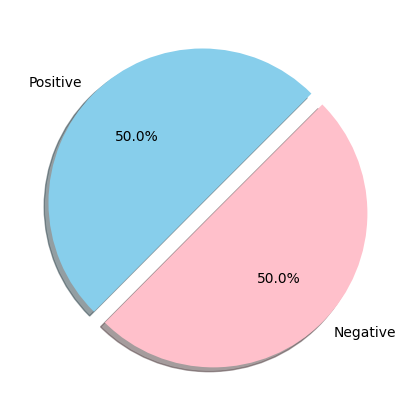

In [32]:
# Now let’s visualize the distribution of the data:

fig = plt.figure(figsize=(5,5))
colors= ['skyblue','pink']
values = data['label'].value_counts()
plot = plt.pie(values,
               labels= ['Positive','Negative'],
              autopct = '%1.1f%%',
              shadow = True,
              colors = colors,              
              startangle = 45,
              explode = (0,0.1))

In [33]:
# Text Preprocessing

import re
def preprocessor(text):
    text = re.sub('<[^>]*>','',text)
    emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
    text = re.sub('[\W]+',' ',text.lower()) +\
    ' '.join(emojis).replace('-','')
    return text

data['text'] = data['text'].apply(preprocessor)

In [37]:
# using nltk’s PorterStemmer to simplify the data and remove unnecessary complexities in our text data
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
def tokenizer(text):
    return text.split()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Positive words are as follows


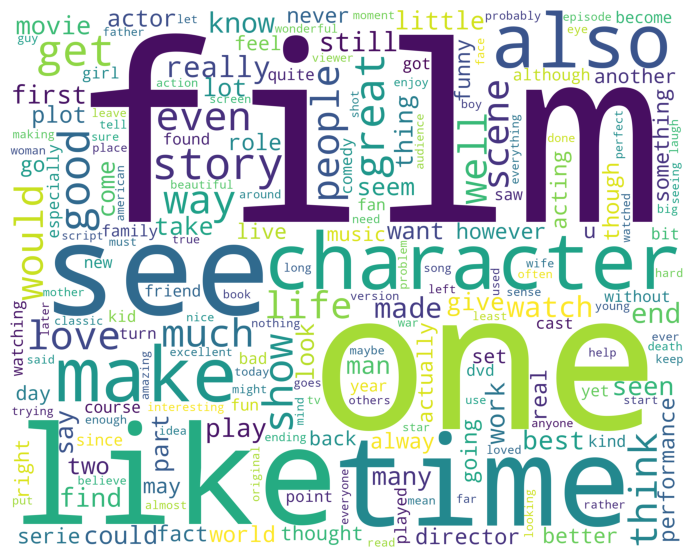

Negative words are as follows


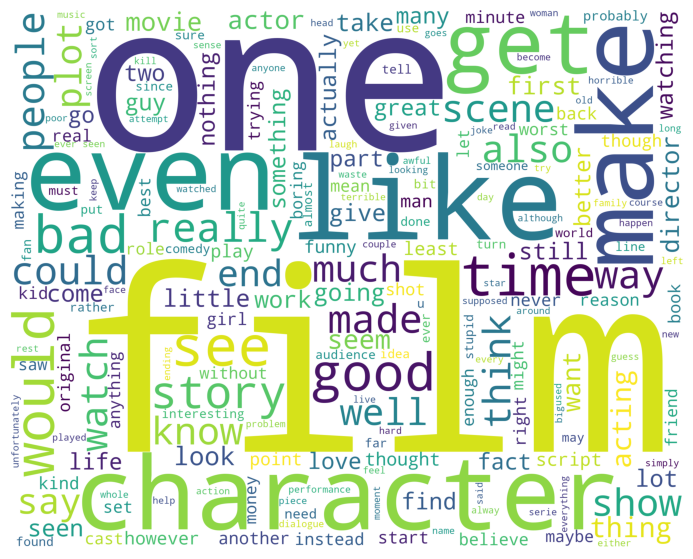

In [43]:
## Visualizing Negative and Positive Words
# removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=stopwords.words('english')

from wordcloud import WordCloud
positive_data = data[data['label'] == 1]
negative_data = data[data['label'] == 0]
positive_data = positive_data['text']
negative_data = negative_data['text']

def wordcloud_draw(data, color = 'white'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if(word!= 'movie' and word!= 'flim')
                            ])
    
    wc = WordCloud(stopwords = stop,
                  background_color=color,
                  width = 2500,
                  height = 2000).generate(cleaned_word)
    plt.figure(1,figsize=(10,7))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()
    
print("Positive words are as follows")
wordcloud_draw(positive_data,'white')
print("Negative words are as follows")
wordcloud_draw(negative_data)

<li> The positive words that are highlighted are love, excellent, perfect, good, beautiful, kind, excellent 
<li> The negative words that are highlighted are: horrible, wasteful, problem, stupid, horrible, bad, poor.

Now I will use the TF-IDF Vertorizer to convert the raw documents into feature matrix which is very important to train a Machine Learning model:

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None,
                        tokenizer=tokenizer_porter,
                        use_idf = True, norm = 'l2', 
                        smooth_idf = True)
y = data.label.values
x = tfidf.fit_transform(data.text)

### Training Machine Learning Model

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(x,y,random_state = 1,test_size = 0.3,shuffle = False)

print('Training Size:',X_train.shape)
print('Test Size:', y_test.shape)

Training Size: (28000, 66595)
Test Size: (12000,)


In [56]:
from sklearn.linear_model import LogisticRegressionCV
classifier = LogisticRegressionCV(cv=5,scoring = 'accuracy',random_state=0, n_jobs = -1, verbose=3,max_iter = 500).fit(X_train,y_train)
y_pred = classifier.predict(X_test)

# Model Evolution
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.0min remaining:  2.9min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.1min finished


<IPython.core.display.Javascript object>

Accuracy: 0.894


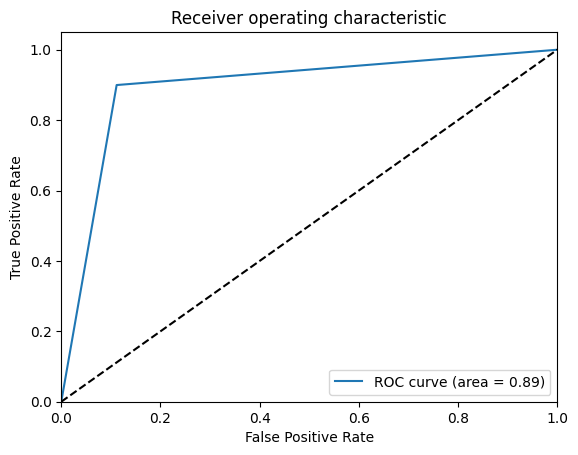

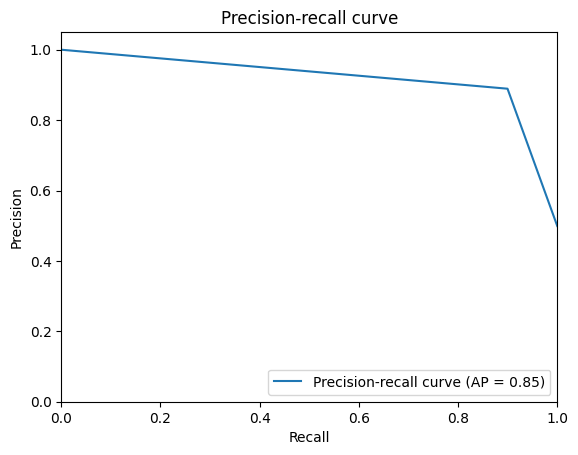

In [59]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

# y_test contains the true labels of the test data
# y_pred contains the predicted probabilities of the test data

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

# Plot PR curve
plt.figure()
plt.plot(recall, precision, label='Precision-recall curve (AP = %0.2f)' % average_precision_score(y_test, y_pred))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.legend(loc="lower right")

plt.show()


## Conclusion
The sentiment analysis model has a good performance with a ROC score of 0.89 and a PRC score of 0.85. This indicates that the model is able to distinguish between positive and negative sentiment with high accuracy and precision, making it suitable for classifying new text data.